# Erste Infos für die Veranstaltung

## Termine und Ablauf

+ 01.11.: Einstieg, Überblick, erste Schritte --> 🔨 Übungen
+ 06.11.: Statistik und Explorative Datenanalyse --> 🔨 Übungen
+ 22.11.: Statistische Modelle - Machine Learning (ML) - Teil 1 --> 🔨 Übungen
+ 29.11.: ML- Teil 2 --> 🔨 Übungen
+ 06.12.: Nikolaus!! Visualisierung, Vorbereitung Abschlussaufgabe --> 🔨 Übungen
+ 22.12.: Abgabe der Abschlussarbeit als Py-Notebook

⭐

## Wichtige Links

* GitHub Repository für Vorlesungsmaterialien: https://github.com/geoclaudsch/DASC-2024
* Nextcloud für Übungsaufgaben-Abgabe: https://nc.ufz.de/s/ai2zHScBEic8S8r (Passwort: !DASC_ba_2024)
* Email bei Fragen: e5000018@ba-sachsen.de
* Telefon bei ganz dringenden Fragen: 0341-6025-1803 (Zoom)

In [143]:
print('Hello world!')

Hello world!


## Task 1

In [ ]:
import pandas as pd
import numbers as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import plotly.express as px

In [145]:
task1_file_path = "./VL1_Intro/task/data_science_salaries_2024.csv"

In [146]:
t1_data = pd.read_csv(task1_file_path)

In [147]:
t1_data.head()

,job_title,experience_level,employment_type,work_models,work_year,employee_residence,salary,salary_currency,salary_in_usd,company_location,company_size
0,Data Engineer,Mid-level,Full-time,Remote,2024,United States,148100,USD,148100,United States,Medium
1,Data Engineer,Mid-level,Full-time,Remote,2024,United States,98700,USD,98700,United States,Medium
2,Data Scientist,Senior-level,Full-time,Remote,2024,United States,140032,USD,140032,United States,Medium
3,Data Scientist,Senior-level,Full-time,Remote,2024,United States,100022,USD,100022,United States,Medium
4,BI Developer,Mid-level,Full-time,On-site,2024,United States,120000,USD,120000,United States,Medium


In [148]:
t1_data["employee_residence"].unique()

array(['United States', 'Romania', 'Portugal', 'Lebanon', 'India',
       'Ireland', 'United Kingdom', 'Spain', 'Egypt', 'Germany', 'Canada',
       'Australia', 'Vietnam', 'Uganda', 'Italy', 'Thailand',
       'Philippines', 'Tunisia', 'Belgium', 'Turkey', 'Nigeria',
       'Uzbekistan', 'Argentina', 'France', 'Kuwait', 'Ukraine',
       'South Africa', 'Slovenia', 'Singapore', 'Sweden', 'Saudi Arabia',
       'Armenia', 'Russia', 'Georgia', 'Qatar', 'Peru', 'Poland',
       'New Zealand', 'Norway', 'Netherlands', 'Mexico', 'Latvia',
       'Pakistan', 'Lithuania', 'South Korea', 'Kenya', 'Moldova',
       'Israel', 'Hungary', 'Croatia', 'Hong Kong', 'Greece', 'Ghana',
       'Finland', 'Estonia', 'Cyprus', 'Ecuador', 'Austria', 'Colombia',
       'Switzerland', 'Central African Republic', 'Czech Republic',
       'Brazil', 'Bosnia and Herzegovina', 'Andorra', 'China',
       'Costa Rica', 'Chile', 'Bolivia', 'Malaysia',
       'United Arab Emirates', 'Puerto Rico', 'Japan', 'Iran',
 

In [149]:
t1_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6599 entries, 0 to 6598
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   job_title           6599 non-null   object
 1   experience_level    6599 non-null   object
 2   employment_type     6599 non-null   object
 3   work_models         6599 non-null   object
 4   work_year           6599 non-null   int64 
 5   employee_residence  6599 non-null   object
 6   salary              6599 non-null   int64 
 7   salary_currency     6599 non-null   object
 8   salary_in_usd       6599 non-null   int64 
 9   company_location    6599 non-null   object
 10  company_size        6599 non-null   object
dtypes: int64(3), object(8)
memory usage: 567.2+ KB


- keine null werte
- beachte object für EDA und ML

In [150]:
print("Mittelwertt: \t\t", t1_data["salary_in_usd"].mean())
print("Median: \t\t", t1_data["salary_in_usd"].median())
print("Standardabweichung: \t", t1_data["salary_in_usd"].std())

Mittelwertt: 		 145560.55856948023
Median: 		 138666.0
Standardabweichung: 	 70946.83806953012


In [151]:
features = t1_data.columns
object_features = []
int_features = []
for feature in features:
    if t1_data[feature].dtype == "object":
        object_features.append(feature)
    else:
        int_features.append(feature)

Anzahl einzigartiger Elemente der jeweiligen features bei object features

In [152]:
object_df = t1_data[object_features]
[print(feature, ": ", len(object_df[feature].unique())) for feature in object_df]

job_title :  132
experience_level :  4
employment_type :  4
work_models :  3
employee_residence :  87
salary_currency :  22
company_location :  75
company_size :  3


[None, None, None, None, None, None, None, None]

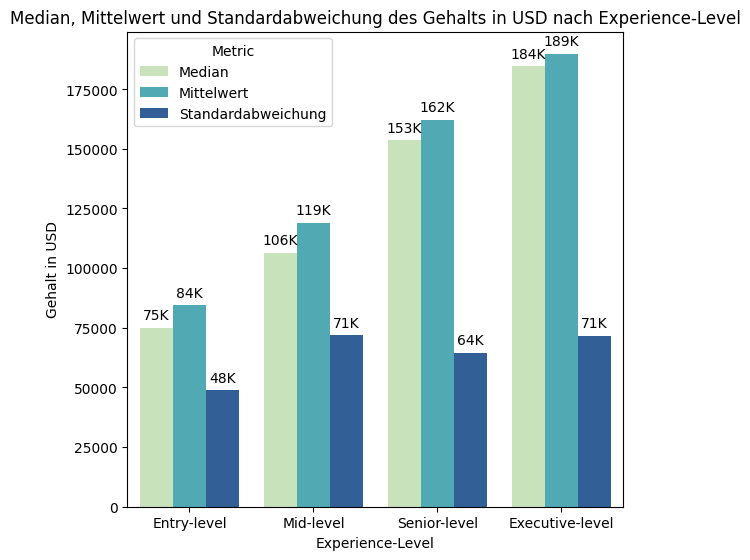

In [153]:
summary = t1_data.groupby("experience_level")["salary_in_usd"].agg(
    Median="median",
    Mittelwert="mean",
    Standardabweichung="std"
).reset_index()
experience_order = ["Entry-level", "Mid-level", "Senior-level", "Executive-level"]
summary['experience_level'] = pd.Categorical(summary['experience_level'], categories=experience_order, ordered=True)
summary = summary.sort_values('experience_level')
summary_long = summary.melt(id_vars='experience_level', 
                            value_vars=['Median', 'Mittelwert', 'Standardabweichung'],
                            var_name='Metric', value_name='salary_in_usd')
plt.title("Median, Mittelwert und Standardabweichung des Gehalts in USD nach Experience-Level")
plot = sns.barplot(summary_long, x="experience_level", y="salary_in_usd", hue="Metric", palette="YlGnBu")
for p in plot.patches:
    value_k = f"{int(p.get_height() / 1000)}K"  # Wert in Tausendern mit "K" suffix
    plot.annotate(value_k, 
                  (p.get_x() + p.get_width() / 2., p.get_height()), 
                  ha = 'center', va = 'center', 
                  xytext = (0, 9), 
                  textcoords = 'offset points')
plt.xlabel("Experience-Level")
plt.ylabel("Gehalt in USD")
plt.subplots_adjust(top=1.1) 
plt.savefig("Barplot Gehalt nach Experience-Level")
plt.show()

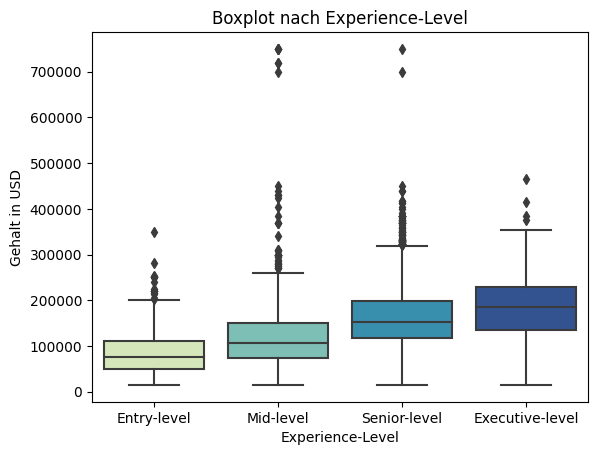

In [154]:
order = t1_data.groupby('experience_level')['salary_in_usd'].median().sort_values().index
plt.title("Boxplot nach Experience-Level")
sns.boxplot(x="experience_level", y="salary_in_usd", data=t1_data, order=order, palette="YlGnBu")
plt.xlabel("Experience-Level")
plt.ylabel("Gehalt in USD")
plt.savefig("Boxplot Experience-Level")
plt.show()

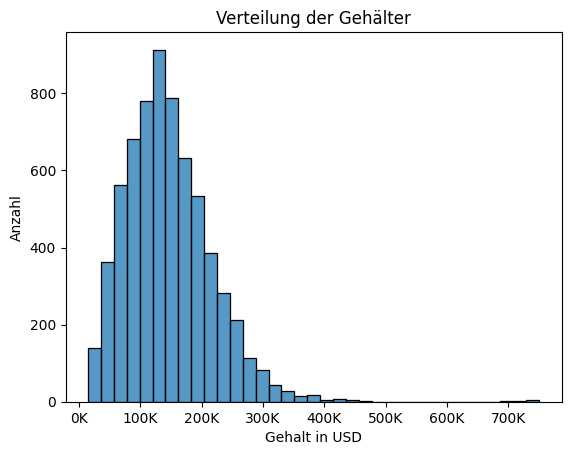

In [155]:
plt.title("Verteilung der Gehälter")
sns.histplot(t1_data["salary_in_usd"], bins=35)
plt.xlabel("Gehalt in USD")
plt.ylabel("Anzahl")
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x/1000)}K'))
plt.savefig("Histplot Gehaltsverteilung")
plt.show()

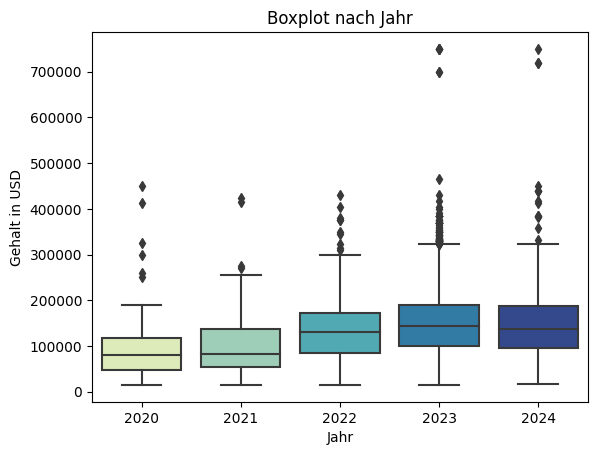

In [156]:
plt.title("Boxplot nach Jahr")
sns.boxplot(x="work_year", y="salary_in_usd", data=t1_data, palette="YlGnBu")
plt.xlabel("Jahr")
plt.ylabel("Gehalt in USD")
plt.savefig("Boxplot Work Year")
plt.show()

Median Gehalt in USD nach Land

In [170]:
median_salary_by_country = t1_data.groupby('employee_residence')['salary_in_usd'].median().reset_index()

# Create the choropleth map
fig = px.choropleth(
    median_salary_by_country,
    locations="employee_residence",
    locationmode="country names",
    color="salary_in_usd",
    hover_name="employee_residence",
    color_continuous_scale=px.colors.sequential.Plasma,
    title="Median Gehalt nach Land"
)


# Update layout to increase the size of the output
fig.update_layout(
    width=1600,
    height=900
)

# Show the figure
fig.show()